In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/train.txt', header=None, sep=';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/test.txt', header=None, sep=';', names = ['Input','Sentiment'], encoding='utf-8')
df_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/val.txt', header=None, sep=';', names = ['Input','Sentiment'], encoding='utf-8')

In [5]:
df_full = pd.concat([df_train,df_test,df_val], axis=0)
df_full

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [6]:
!pip install text_hammer

     |████████████████████████████████| 115 kB 4.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [7]:
import text_hammer as th

In [8]:
%%time

from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
#     df[column] = df[column].progress_apply(lambda x: ps.remove_stopwords(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
#     df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 779 µs, sys: 0 ns, total: 779 µs
Wall time: 790 µs


In [9]:
df_cleaned = text_preprocessing(df_full, 'Input')

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

In [10]:
df_cleaned.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [11]:
df_cleaned = df_cleaned.copy()

In [12]:
df_cleaned['num_words'] = df_cleaned.Input.apply(lambda x: len(x.split()))

In [13]:
df_cleaned.head()

,Input,Sentiment,num_words
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,21
2,im grabbing a minute to post i feel greedy wrong,anger,10
3,i am ever feeling nostalgic about the fireplac...,love,18
4,i am feeling grouchy,anger,4


In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      20000 non-null  object
 1   Sentiment  20000 non-null  object
 2   num_words  20000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 625.0+ KB


In [15]:
df_cleaned['Sentiment'] = df_cleaned.Sentiment.astype('category')

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Input      20000 non-null  object  
 1   Sentiment  20000 non-null  category
 2   num_words  20000 non-null  int64   
dtypes: category(1), int64(1), object(1)
memory usage: 488.5+ KB


In [17]:
df_cleaned.Sentiment.unique

<bound method Series.unique of 0       sadness
1       sadness
2         anger
3          love
4         anger
         ...   
1995    sadness
1996        joy
1997        joy
1998        joy
1999        joy
Name: Sentiment, Length: 20000, dtype: category
Categories (6, object): ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']>

In [18]:
df_cleaned.Sentiment.cat.codes

0       4
1       4
2       0
3       3
4       0
       ..
1995    4
1996    2
1997    2
1998    2
1999    2
Length: 20000, dtype: int8

In [19]:
encoded_dict = {'anger':0, 'fear':1, 'joy':2, 'love':3, 'sadness':4, 'surprise':5}

In [20]:
df_cleaned['Sentiment'] = df_cleaned.Sentiment.cat.codes
df_cleaned.Sentiment

0       4
1       4
2       0
3       3
4       0
       ..
1995    4
1996    2
1997    2
1998    2
1999    2
Name: Sentiment, Length: 20000, dtype: int8

In [21]:
df_cleaned.head()

,Input,Sentiment,num_words
0,i didnt feel humiliated,4,4
1,i can go from feeling so hopeless to so damned...,4,21
2,im grabbing a minute to post i feel greedy wrong,0,10
3,i am ever feeling nostalgic about the fireplac...,3,18
4,i am feeling grouchy,0,4


In [22]:
df_cleaned.num_words.max()

66

In [23]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(df_cleaned, test_size = 0.3, random_state = 42, stratify = df_cleaned.Sentiment)

In [24]:
data_train.shape

(14000, 3)

In [25]:
data_test.shape

(6000, 3)

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
data_train.head()

,Input,Sentiment,num_words
7181,i feel more sure with where i am going in my b...,2,12
9479,i feel uptight is it any wonder i dont know wh...,1,12
812,i allowed myself to eat foods that i know both...,4,33
8670,i was happy with the progress but i was also b...,4,16
1014,im alone in this apartment i get this overwhel...,4,18


In [28]:
to_categorical(data_train.Sentiment)

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [29]:
pip install transformers

     |████████████████████████████████| 4.0 MB 4.3 MB/s 
     |████████████████████████████████| 880 kB 50.3 MB/s 
     |████████████████████████████████| 596 kB 43.3 MB/s 
     |████████████████████████████████| 6.6 MB 29.4 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=00d35330303639447a9f94f652a6a4434ea4413c6871898d386adc23eb4359f6
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [30]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
###for saving model locally and we can load it later on

In [ ]:
tokenizer.save_pretrained('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/bert-tokenizer')
bert.save_pretrained('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/bert-model')

KeyboardInterrupt: ignored

In [ ]:
import shutil
shutil.make_archive('bert-tokenizer', 'zip', 'bert-tokenizer')
shutil.make_archive('bert-model','zip','bert-model')

KeyboardInterrupt: ignored

In [31]:
tokenizer('Hello this was me')

{'input_ids': [101, 8667, 1142, 1108, 1143, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [32]:
x_train = tokenizer(
    text=data_train.Input.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [33]:
x_test = tokenizer(
    text=data_test.Input.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [34]:
x_test['input_ids']

<tf.Tensor: shape=(6000, 70), dtype=int32, numpy=
array([[ 101,  178, 1474, ...,    0,    0,    0],
       [ 101,  178, 1631, ...,    0,    0,    0],
       [ 101,  178, 2045, ...,    0,    0,    0],
       ...,
       [ 101,  178, 1138, ...,    0,    0,    0],
       [ 101,  178, 1180, ...,    0,    0,    0],
       [ 101, 5178, 5427, ...,    0,    0,    0]], dtype=int32)>

In [35]:
x_train['input_ids']

<tf.Tensor: shape=(14000, 70), dtype=int32, numpy=
array([[  101,   178,  1631, ...,     0,     0,     0],
       [  101,   178,  1631, ...,     0,     0,     0],
       [  101,   178,  2148, ...,     0,     0,     0],
       ...,
       [  101,   178,  2423, ...,     0,     0,     0],
       [  101, 13280,  1136, ...,     0,     0,     0],
       [  101,   178,  1631, ...,     0,     0,     0]], dtype=int32)>

In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

In [37]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[]

In [38]:
max_len = 70
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids,attention_mask = input_mask)[0]


embeddings = bert(input_ids,attention_mask = input_mask)[0] #(0 is the last hidden states,1 means pooler_output)
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)

y = Dense(6,activation = 'sigmoid')(out)
    
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True
# for training bert our lr must be so small

In [39]:
model.layers  # 2nd index is the bert model that's why use model.layer[2]

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 70,                                            

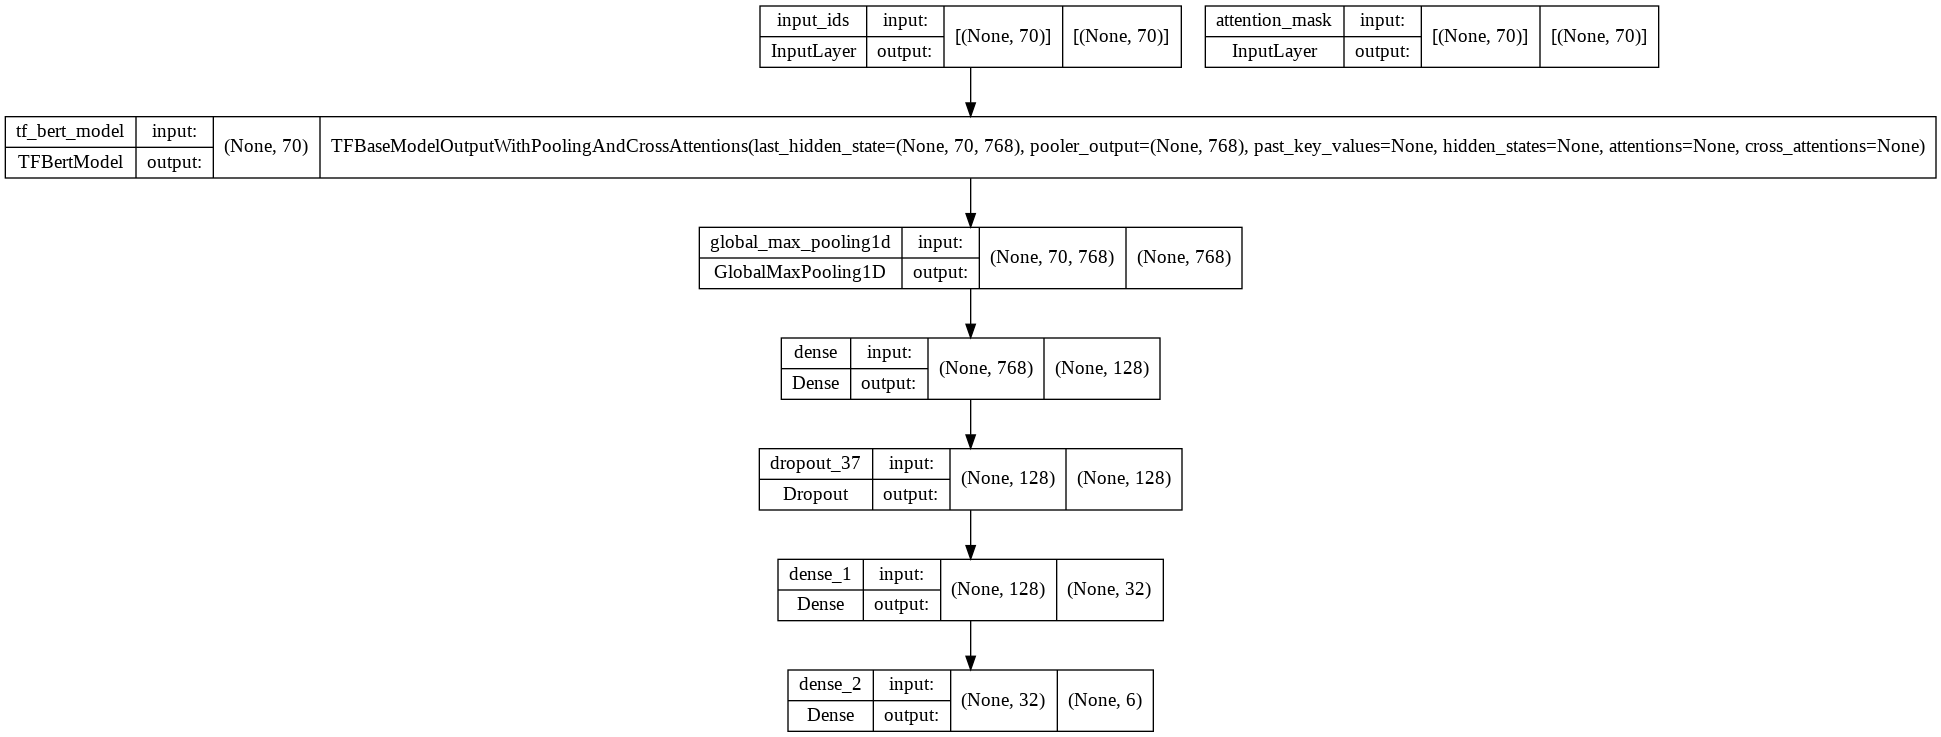

In [41]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [42]:
optimizer = Adam(
    learning_rate=5e-05, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

In [43]:
# Set loss and metrics
loss =CategoricalCrossentropy(from_logits = True)
metric = CategoricalAccuracy('balanced_accuracy'),

In [44]:
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

In [45]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
##Model Fitting and Evaluation

##Save Untrained model

In [ ]:
!pip install joblib

In [ ]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/untrained_model', compress=True )

INFO:tensorflow:Assets written to: ram://b608f975-82b0-4e8c-88b8-0c8678d16b87/assets


INFO:tensorflow:Assets written to: ram://b608f975-82b0-4e8c-88b8-0c8678d16b87/assets


['/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/untrained_model']

##Trained the model

In [ ]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = to_categorical(data_train.Sentiment),
    validation_data = (
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, to_categorical(data_test.Sentiment)
    ),
  epochs=3,
    batch_size=36
)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


389/389 [==============================] - 14143s 36s/step - loss: 0.5624 - balanced_accuracy: 0.8044 - val_loss: 0.2043 - val_balanced_accuracy: 0.9267
Epoch 2/3
389/389 [==============================] - 14332s 37s/step - loss: 0.1689 - balanced_accuracy: 0.9356 - val_loss: 0.1571 - val_balanced_accuracy: 0.9338
Epoch 3/3
389/389 [==============================] - ETA: 0s - loss: 0.1244 - balanced_accuracy: 0.9467 

###Save model with weights

In [1]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/sentiment_weights.h5')

NameError: ignored

In [ ]:
model.load_weights('sentiment_weights.h5')

OSError: ignored

###Save model directly

In [ ]:
import os
model_fname = 'Sentiment_Model_PathSave'
path = '/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2'

model.save(os.path.join(path, model_fname))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/Sentiment_Model_PathSave/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/Sentiment_Model_PathSave/assets


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/Sentiment_Model_Direct.h5')

##Prediction Part

###Testing Model

In [ ]:
predicted_raw = model.predict({'input_ids':x_test['input_ids'], 'attention_mask':x_test['attention_mask']})

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


##For Prdiction

In [ ]:
!pip install tensorflow

In [ ]:
## new_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/untrained_model')

ValueError: ignored

In [ ]:
new_model=model

In [ ]:
new_model.load_weights('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis_v2/sentiment_weights.h5')

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 70,                                            

In [ ]:
texts = input(str('input the text'))

x_val = tokenizer(
    text=texts,
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding='max_length', 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True) 
validation = new_model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100
validation

input the textI am Happy


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


array([[75.660034, 59.971554, 99.9638  , 91.87749 , 66.819695, 35.100998]],
      dtype=float32)

In [ ]:
for key , value in zip(encoded_dict.keys(),validation[0]):
  print(key,value)

anger 75.660034
fear 59.971554
joy 99.9638
love 91.87749
sadness 66.819695
surprise 35.100998
